In [49]:
import numpy as np
import numpy.random as ra
import matplotlib.pyplot as plt
from tqdm import tqdm

In [63]:
def simulate(n=100, p=0.5, r=0.7):
    lb = int(n*r)
    
    X = np.zeros(n)
    Y = np.zeros(n)
    X[:lb + 1] = 1
    Y[-lb-1:] = 1

    sx = int(np.sum(X))
    sy = int(np.sum(Y))

    dist = int(np.sum(np.logical_xor(X, Y)))
    
    count = 0
    while dist > 0:
        count += 1
        
        i = ra.randint(n)
        U = ra.uniform()
    
        sx -= X[i]
        sy -= Y[i]
        dist -= int(X[i]) ^ int(Y[i])
    
        if sx > lb:
            X[i] = 1 if U < p else 0
        else:
            X[i] = 1 if U < p or X[i] == 1 else 0
            
        if sy > lb:
            Y[i] = 1 if U < p else 0
        else:
            Y[i] = 1 if U < p or Y[i] == 1 else 0        
        
        sx += X[i]
        sy += Y[i]
        dist += int(X[i]) ^ int(Y[i])
        
    return count

100%|██████████| 10000/10000 [01:31<00:00, 109.86it/s]


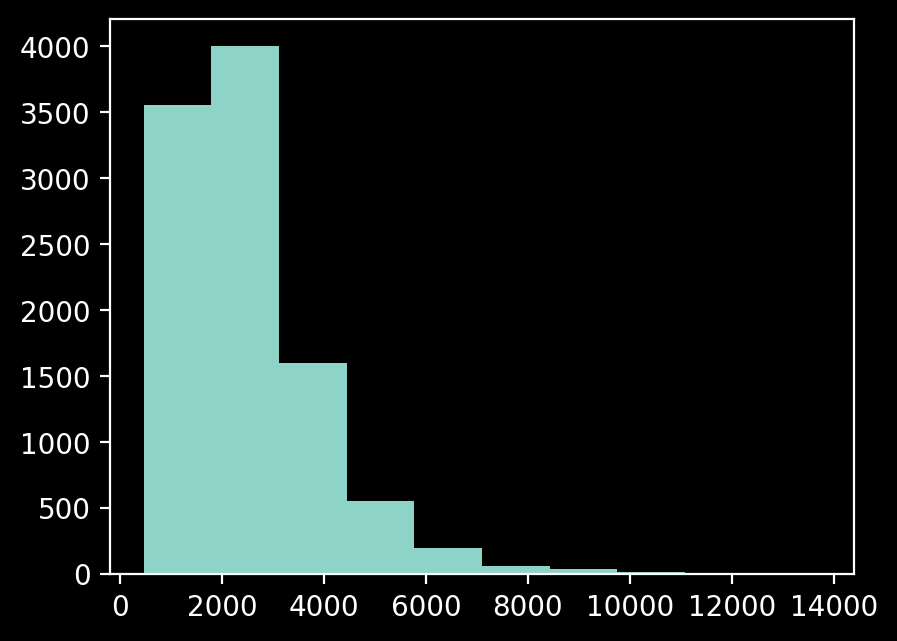

In [70]:
_=plt.hist([ simulate() for _ in tqdm(range(10000)) ])